In [1]:
from nixtlats import NixtlaClient
from dotenv import load_dotenv
import os

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.getenv("NIXTLATS_API_KEY")
)

# checking if the API key is valid
nixtla_client.validate_api_key()

INFO:nixtlats.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

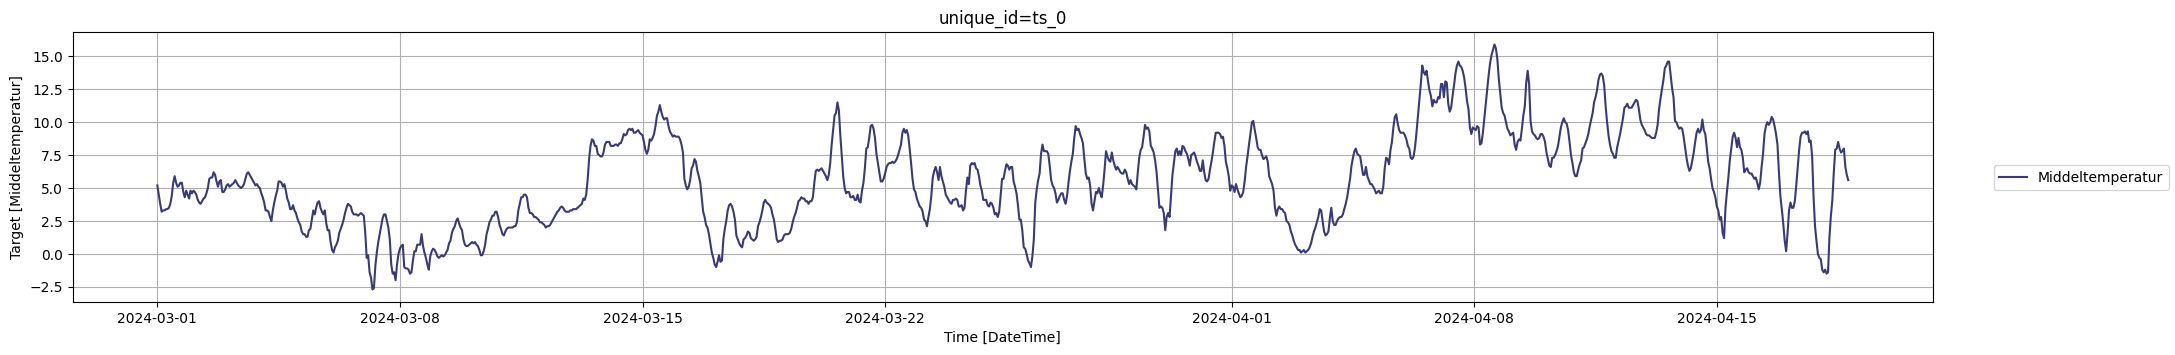

In [2]:
import pandas as pd 

test = pd.read_csv(os.path.join('..','data','weather', 'AarhusSydObservations', 'splits', 'test', 'test.csv'))
train = pd.read_csv(os.path.join('..','data','weather', 'AarhusSydObservations', 'splits', 'train', 'train.csv'))

# plotting all data
nixtla_client.plot(train, time_col='DateTime', target_col='Middeltemperatur')

functions

In [4]:
import pandas as pd
from pandas import DataFrame
import os

path_to_files = '../data/weather/AarhusSydObservations/data_partitions/'  # path to files
files = os.listdir(path_to_files)

# Filter out only the relevant CSV files (you may adjust the pattern if needed)
csv_files = [f for f in files if f.startswith('Partition') and f.endswith('.csv')]

# Load all partitions
partitions = {}
for file in csv_files:
    # Extracting the partition name and type (train or test)
    name, partition_type = file.replace('.csv', '').rsplit('_', 1)
    if name not in partitions:
        partitions[name] = {}
    partitions[name][partition_type] = pd.read_csv(path_to_files + file)

# Defining the forecasting function (this is a placeholder; you will need a real function)
def forecast_and_calculate_error(df_train, df_test, n_steps_to_forecast, time_collum, target_column, freq='h', model = 'timegpt-1'):
    """
    n_steps_to_forecast: steps ahead to forecast
    freq: frequency of the time series data (MS=month start, D=day etc.)
    time_col: name of the column with the time data
    target_col: name of the column with the target data
    """
    # forecasting h steps ahead
    timegpt_fcst_df = nixtla_client.forecast(df=df_train, h=n_steps_to_forecast, freq=freq, time_col=time_collum, target_col=target_column, model = model)

    df_test_new = df_test[[time_collum, target_column]] # selecting only the time and target column
    df_test_new_h = df_test_new[0:n_steps_to_forecast] # making the test data the same size as the forecast

    # calculating the error between TimeGPT column in the forecast and the target column
    timegpt_fcst_df_with_test = timegpt_fcst_df.join(df_test_new_h, lsuffix='_left', rsuffix='_right')
    timegpt_fcst_df_with_test['error'] = timegpt_fcst_df_with_test[target_column] - timegpt_fcst_df_with_test['TimeGPT']

    return timegpt_fcst_df_with_test

for partition, datasets in partitions.items():
    train_df = datasets['train']
    test_df = datasets['test']
    n_steps_to_forecast = len(test_df)  # 
    time_col = 'DateTime'  # # time column
    target_col = 'Middeltemperatur'  # target column

    # Perform your forecasting and error calculation here
    error_df = forecast_and_calculate_error(train_df, test_df, n_steps_to_forecast, time_col, target_col)

    # You can do something with the error_df here, like printing or storing the error statistics
    print(f"Results for {partition}:")
    print(error_df.head())  # For example, just print the first few rows of the error DataFrame

    # Optional: Saving the results back to CSV
    error_df.to_csv(f'{partition}_errors.csv', index=False)

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_120_train_750:
         DateTime_left   TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-26 01:00:00  3.085881  2024-04-26 01:00:00               4.0   
1  2024-04-26 02:00:00  2.774104  2024-04-26 02:00:00               3.7   
2  2024-04-26 03:00:00  2.592773  2024-04-26 03:00:00               4.2   
3  2024-04-26 04:00:00  2.454962  2024-04-26 04:00:00               3.8   
4  2024-04-26 05:00:00  2.544678  2024-04-26 05:00:00               3.9   

      error  
0  0.914119  
1  0.925896  
2  1.607227  
3  1.345038  
4  1.355322  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_12_train_250:
         DateTime_left    TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-30 13:00:00  14.180570  2024-04-30 13:00:00              14.6   
1  2024-04-30 14:00:00  14.109629  2024-04-30 14:00:00              16.0   
2  2024-04-30 15:00:00  14.226956  2024-04-30 15:00:00              16.8   
3  2024-04-30 16:00:00  14.082127  2024-04-30 16:00:00              16.9   
4  2024-04-30 17:00:00  13.882858  2024-04-30 17:00:00              15.6   

      error  
0  0.419430  
1  1.890371  
2  2.573044  
3  2.817873  
4  1.717142  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_120_train_50:
         DateTime_left   TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-26 01:00:00  3.508518  2024-04-26 01:00:00               4.0   
1  2024-04-26 02:00:00  3.498699  2024-04-26 02:00:00               3.7   
2  2024-04-26 03:00:00  3.308907  2024-04-26 03:00:00               4.2   
3  2024-04-26 04:00:00  3.171303  2024-04-26 04:00:00               3.8   
4  2024-04-26 05:00:00  3.186811  2024-04-26 05:00:00               3.9   

      error  
0  0.491482  
1  0.201301  
2  0.891093  
3  0.628697  
4  0.713189  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_12_train_750:
         DateTime_left    TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-30 13:00:00  14.180570  2024-04-30 13:00:00              14.6   
1  2024-04-30 14:00:00  14.109629  2024-04-30 14:00:00              16.0   
2  2024-04-30 15:00:00  14.226956  2024-04-30 15:00:00              16.8   
3  2024-04-30 16:00:00  14.082127  2024-04-30 16:00:00              16.9   
4  2024-04-30 17:00:00  13.882858  2024-04-30 17:00:00              15.6   

      error  
0  0.419430  
1  1.890371  
2  2.573044  
3  2.817873  
4  1.717142  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_120_train_250:
         DateTime_left   TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-26 01:00:00  3.085881  2024-04-26 01:00:00               4.0   
1  2024-04-26 02:00:00  2.774104  2024-04-26 02:00:00               3.7   
2  2024-04-26 03:00:00  2.592773  2024-04-26 03:00:00               4.2   
3  2024-04-26 04:00:00  2.454962  2024-04-26 04:00:00               3.8   
4  2024-04-26 05:00:00  2.544678  2024-04-26 05:00:00               3.9   

      error  
0  0.914119  
1  0.925896  
2  1.607227  
3  1.345038  
4  1.355322  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_12_train_50:
         DateTime_left    TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-30 13:00:00  14.123542  2024-04-30 13:00:00              14.6   
1  2024-04-30 14:00:00  14.296951  2024-04-30 14:00:00              16.0   
2  2024-04-30 15:00:00  14.118582  2024-04-30 15:00:00              16.8   
3  2024-04-30 16:00:00  13.919002  2024-04-30 16:00:00              16.9   
4  2024-04-30 17:00:00  13.533911  2024-04-30 17:00:00              15.6   

      error  
0  0.476458  
1  1.703049  
2  2.681418  
3  2.980998  
4  2.066089  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_360_train_50:
         DateTime_left   TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-16 01:00:00  5.557316  2024-04-16 01:00:00               5.9   
1  2024-04-16 02:00:00  5.389157  2024-04-16 02:00:00               5.7   
2  2024-04-16 03:00:00  5.123973  2024-04-16 03:00:00               5.8   
3  2024-04-16 04:00:00  4.940825  2024-04-16 04:00:00               5.4   
4  2024-04-16 05:00:00  4.870224  2024-04-16 05:00:00               4.9   

      error  
0  0.342684  
1  0.310843  
2  0.676027  
3  0.459175  
4  0.029776  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Results for Partition_test_360_train_250:
         DateTime_left   TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-16 01:00:00  5.797980  2024-04-16 01:00:00               5.9   
1  2024-04-16 02:00:00  5.654299  2024-04-16 02:00:00               5.7   
2  2024-04-16 03:00:00  5.795963  2024-04-16 03:00:00               5.8   
3  2024-04-16 04:00:00  5.743681  2024-04-16 04:00:00               5.4   
4  2024-04-16 05:00:00  6.009033  2024-04-16 05:00:00               4.9   

      error  
0  0.102020  
1  0.045701  
2  0.004037  
3 -0.343681  
4 -1.109033  


INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


Results for Partition_test_360_train_750:
         DateTime_left   TimeGPT       DateTime_right  Middeltemperatur  \
0  2024-04-16 01:00:00  5.797980  2024-04-16 01:00:00               5.9   
1  2024-04-16 02:00:00  5.654299  2024-04-16 02:00:00               5.7   
2  2024-04-16 03:00:00  5.795963  2024-04-16 03:00:00               5.8   
3  2024-04-16 04:00:00  5.743681  2024-04-16 04:00:00               5.4   
4  2024-04-16 05:00:00  6.009033  2024-04-16 05:00:00               4.9   

      error  
0  0.102020  
1  0.045701  
2  0.004037  
3 -0.343681  
4 -1.109033  
